<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [4]:
#add your code
import pandas as pd
test_data = pd.read_csv('/content/drive/MyDrive/loan-test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/loan-train.csv')
ds = pd.concat([test_data, train_data])
ds.info() # 981 entries, 13 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [27]:
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



*write here ..*

Visualize the target column

In [6]:
#add your code

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [7]:
#add your code
ds.isnull().sum()
missing_val= ds.isnull().sum()
missing_val

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [8]:
percent_missing = missing_val/ len(ds) * 100
percent_missing

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [9]:
missing_val = pd.concat([missing_val, percent_missing], axis=1)
missing_val.columns = ["Num of missing values", "Percent of missing values"]
missing_val

,Num of missing values,Percent of missing values
Loan_ID,0,0.000000
Gender,24,2.446483
Married,3,0.305810
Dependents,25,2.548420
Education,0,0.000000
Self_Employed,55,5.606524
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,27,2.752294
Loan_Amount_Term,20,2.038736


Visualize the missing values using Missingno library

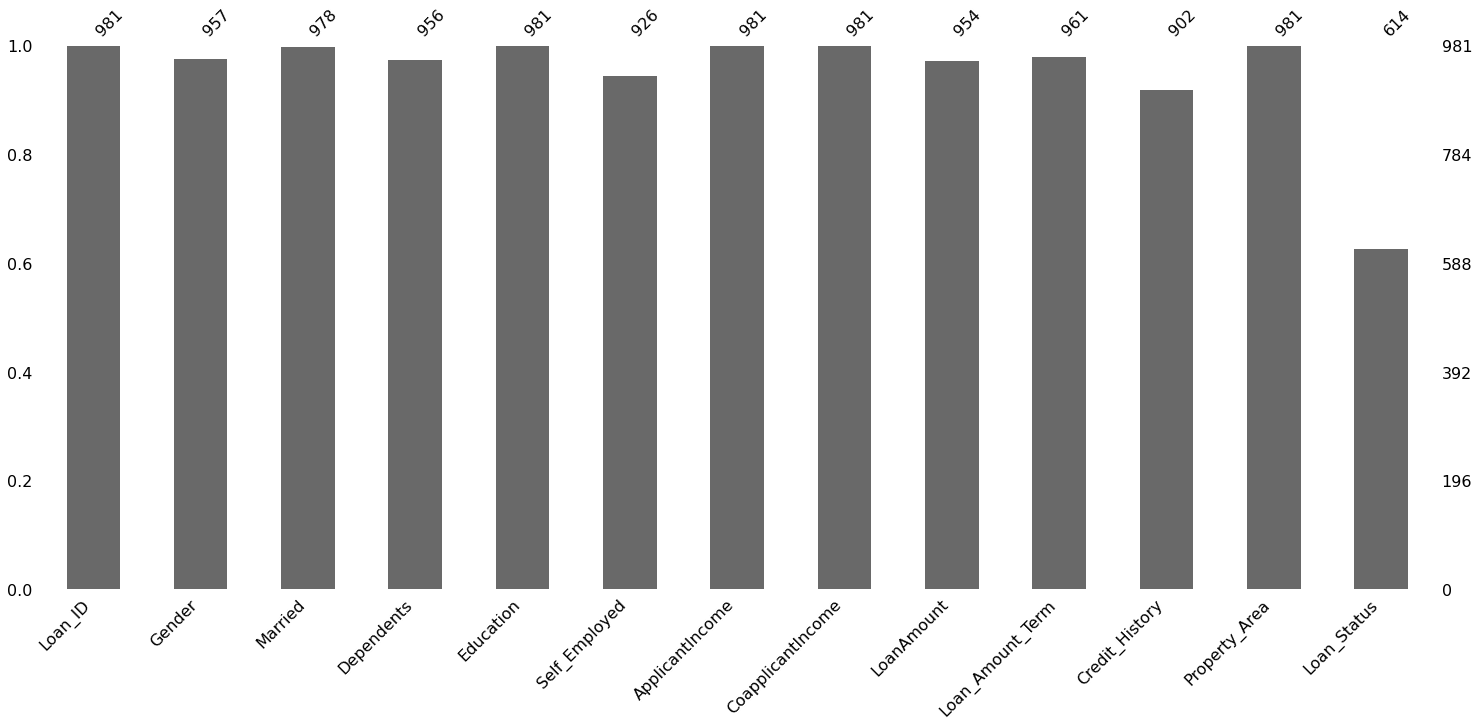

In [10]:
#add your code
import missingno as msno
msno.bar(ds)


## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

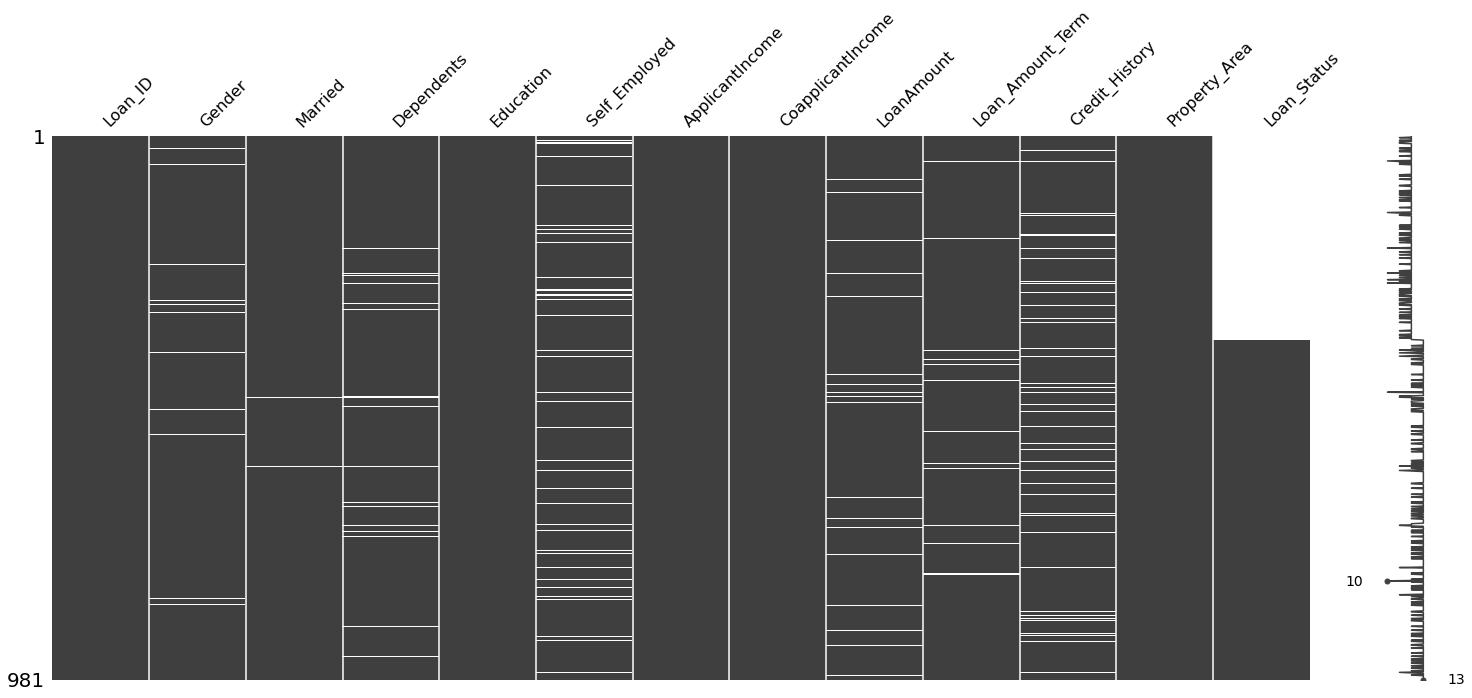

In [11]:
#add your code

msno.matrix(ds)


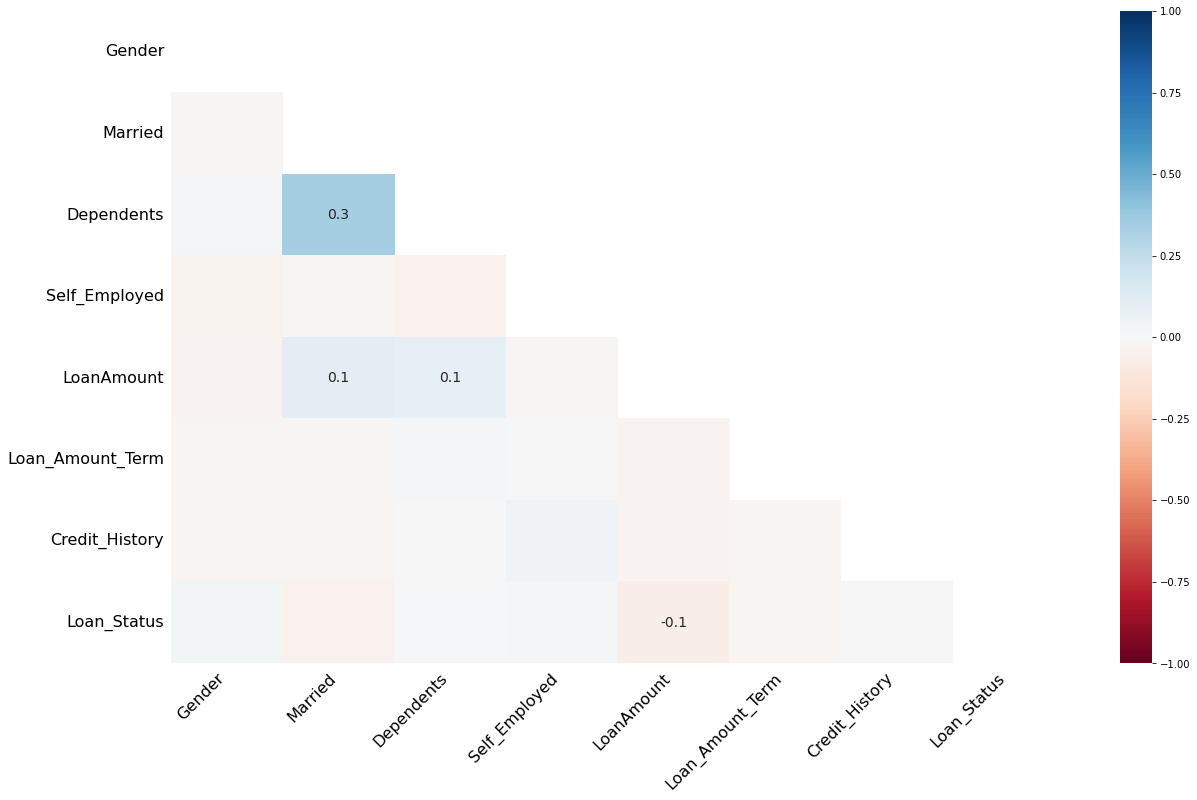

In [12]:
msno.heatmap(ds)

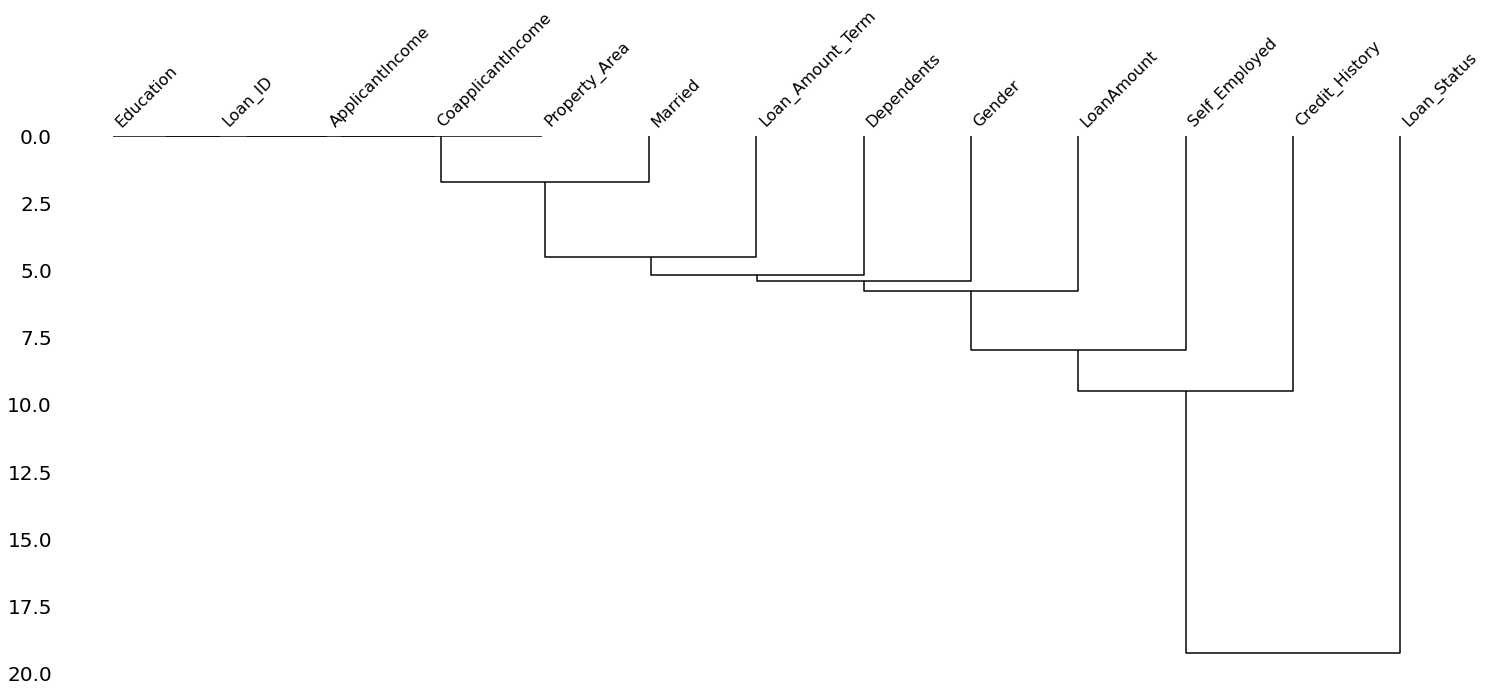

In [13]:
msno.dendrogram(ds)

Write the reasons for the missing values

*write here ..*

Според heatmap, гледаме дека нема вредности блиску до 1(кое ни покажува дека причината за нул вредности во една колона е во корелација со друга) значи може да заклучиме дека нема силна зависност.Највисока бројка ни се јавува 0.3 помеѓу Married и Dependents ама и тоа не е доволно за да кажеме дека се зависни една од друга. Вредностите блиску до -1 ни покажуваат дека кога во една колона имаме нул вредности, во друга имаме дата.
Според dendogram, колку повеќе се одвоени врските во дрвото толку помала корелација.

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [14]:
ds_copy1 = ds.copy() #0
ds_copy2 = ds.copy() #constant

In [15]:
#add your code
ds_copy1.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='constant', fill_value = 0)
ds_copy1.iloc[:,:] = imp.fit_transform(ds_copy1)
ds_copy1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
ds_copy2.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [18]:
imp2 = SimpleImputer(strategy='most_frequent')
ds_copy2.iloc[:,:] = imp.fit_transform(ds_copy2)
ds_copy2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
ds_copy1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0.0,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [20]:
#add your code
ds_copy1.to_csv('/content/drive/MyDrive/ds_loan.csv', index=False)


Print the first rows of your final Dataset

In [21]:
#add your code
ds_copy1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0.0,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,0


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [28]:
#add your code
ds_copy=ds.copy()

In [29]:
#mean
ds_copy.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ApplicantIncome      5179.795107
CoapplicantIncome    1601.916330
LoanAmount            142.511530
Loan_Amount_Term      342.201873
Credit_History          0.835920
dtype: float64

In [30]:
#median
ds_copy.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ApplicantIncome      3800.0
CoapplicantIncome    1110.0
LoanAmount            126.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [31]:
#standard deviation
ds_copy.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ApplicantIncome      5695.104533
CoapplicantIncome    2718.772806
LoanAmount             77.421743
Loan_Amount_Term       65.100602
Credit_History          0.370553
dtype: float64

In [32]:
#min
ds_copy.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Loan_ID              LP001002
Education            Graduate
ApplicantIncome             0
CoapplicantIncome         0.0
LoanAmount                9.0
Loan_Amount_Term          6.0
Credit_History            0.0
Property_Area           Rural
dtype: object

In [33]:
#max
ds_copy.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Loan_ID                  LP002990
Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome         41667.0
LoanAmount                  700.0
Loan_Amount_Term            480.0
Credit_History                1.0
Property_Area               Urban
dtype: object

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [34]:
ds_copy['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [35]:
ds_copy['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


add your answer here

**Make the visualizations using histograms, bar charts, etc.**

In [36]:
#add your code
%matplotlib inline
import matplotlib.pyplot as plt

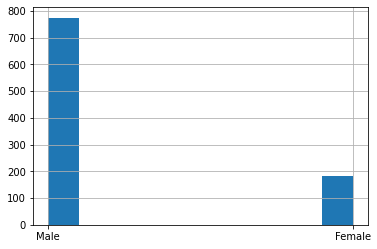

In [37]:
ds_copy['Gender'].hist()


Add as many codeboxes as you need

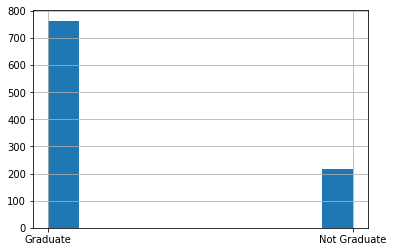

In [38]:
ds_copy['Education'].hist()

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

In [39]:
#add your code 
df= ds_copy.groupby(['Gender','Education']).count()['Loan_ID'].reset_index()
df.columns = ['Gender', 'Education', 'count']
df

,Gender,Education,count
0,Female,Graduate,148
1,Female,Not Graduate,34
2,Male,Graduate,596
3,Male,Not Graduate,179


## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f07d016d810>],
      dtype=object)

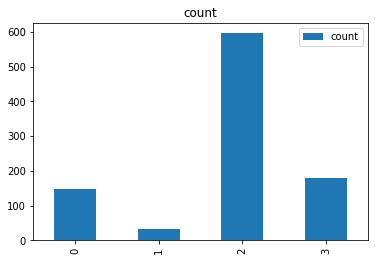

In [40]:
#add your code 
df.plot.bar(subplots=True)

In [41]:
import plotly.express as px

In [45]:
fig = px.bar(
    df,
    x = 'Education',
    y = 'count',
    color = 'Gender',
    title = 'Corelation between gender & education',
    barmode = 'group'
)
fig.show()

<Figure size 432x288 with 0 Axes>

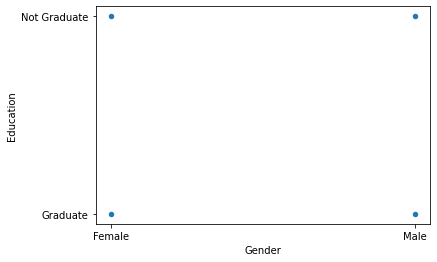

In [52]:
fig=plt.figure()
df.plot.scatter(x="Gender", y="Education")

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash

